In [2]:
from zsimparse import get_hdf5_by_dir, hdf5_get, get_cache_access
import pandas as pd
import numpy as np
import inspect
import matplotlib.pyplot as plt
# import nbimporter
# from result import get_instrs, get_hm_acc

import matplotlib.font_manager as fm
import easypyplot
import matplotlib.patches as patches

%load_ext autoreload
%autoreload 2

In [3]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2.5)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [6]:
fig_name = 'graph_layout_casestudy'
metric_list = ['LayoutHitRate', 'LayoutMissRate', 'LayoutOverflowRate']

csv_hd_1 = pd.read_csv('./layout_access_breakdown/casestudy_staged.csv', sep=',')
LayoutHitRate_1 = np.array(csv_hd_1['LayoutHit']).reshape(-1, 1)
LayoutMissRate_1 = np.array(csv_hd_1['LayoutMiss']).reshape(-1, 1)
LayoutOverflowRate_1 = np.array(csv_hd_1['LayoutOverflow']).reshape(-1, 1)
StageHit_1 = np.array(csv_hd_1['StageHit']).reshape(-1, 1)

csv_hd_2 = pd.read_csv('./layout_access_breakdown/casestudy_unstaged.csv', sep=',')
LayoutHitRate_2 = np.array(csv_hd_2['LayoutHit']).reshape(-1, 1)
LayoutMissRate_2 = np.array(csv_hd_2['LayoutMiss']).reshape(-1, 1)
LayoutOverflowRate_2 = np.array(csv_hd_2['LayoutOverflow']).reshape(-1, 1)

['#138a07', '#cc026c', '#fdc086']
(124, 3)


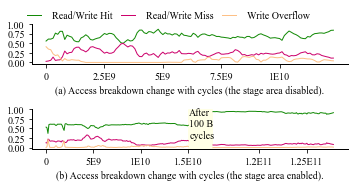

In [7]:
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
y_ticks = list(np.arange(0, 1.1, 0.25))
str_ticklabel = ['%.2f' % item for item in y_ticks]
colors = ['#138a07', '#cc026c', '#fdc086']
print(colors)

ax2 = fig.add_subplot(2, 1, 1)
easypyplot.format.turn_off_box(ax2)
data_len = len(LayoutHitRate_2)
data_x = np.arange(data_len)
data_y = LayoutHitRate_2
data_y = np.hstack((data_y, LayoutMissRate_2, LayoutOverflowRate_2))
# data_y = np.array([LayoutHitRate_2, LayoutMissRate_2, LayoutOverflowRate_2])
print(np.shape(data_y))
hd = []
for i in range(3):
    hd += ax2.plot(data_x, data_y[:, i], color=colors[i])
ax2.set_xticks([0, 25, 50, 75, 100])
ax2.set_xticklabels([0, '2.5E9', '5E9', '7.5E9', '1E10'], fontsize=fig_label_fontsize, fontproperties=ft)
ax2.set_ylim([-0.05, 1.0])
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(str_ticklabel, fontsize=fig_label_fontsize, fontproperties=ft)
ax2.set_xlabel('(a) Access breakdown change with cycles (the stage area disabled).', fontsize=fig_label_fontsize, fontproperties=ft)
easypyplot.format.resize_ax_box(ax2, hratio=0.8)

ax1 = fig.add_subplot(2, 1, 2)
easypyplot.format.turn_off_box(ax1)
data_len = len(LayoutHitRate_1)
gap_len = 25
data_x = np.arange(data_len+gap_len)
data_x_1 = data_x[:151]
data_x_2 = data_x[151 + gap_len:]
data_y = LayoutHitRate_1
data_y = np.hstack((data_y, LayoutMissRate_1, LayoutOverflowRate_1))
data_y_1 = data_y[:151, :]
data_y_2 = data_y[151:, :]
# data_y = np.array([LayoutHitRate_1, LayoutMissRate_1, LayoutOverflowRate_1])
for i in range(3):
    hd1 = ax1.plot(data_x_1, data_y_1[:, i], color=colors[i])
ax1_2 = ax1.twinx()
ax1_2.set_axis_off()
for i in range(3):
    hd1_2 = ax1_2.plot(data_x_2, data_y_2[:, i], color=colors[i])
ax1.set_xticks([0, 50, 100, 150, 200 + gap_len, 250 + gap_len])
ax1.set_xticklabels([0, '5E9', '1E10', '1.5E10', '1.2E11', '1.25E11'], fontsize=fig_label_fontsize, fontproperties=ft)
ax1.set_ylim([-0.05, 1.0])
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(str_ticklabel, fontsize=fig_label_fontsize, fontproperties=ft)
ax1.set_xlabel('(b) Access breakdown change with cycles (the stage area enabled).', fontsize=fig_label_fontsize, fontproperties=ft)
rect = patches.Rectangle(
        (150, -0.1),
        gap_len,
        1.1,
        edgecolor = 'yellow',
        facecolor = 'yellow',
        alpha=0.1,
        fill=True
     )
ax1.add_patch(rect)
ax1.text(151, 0.25, 'After\n100 B\ncycles', fontproperties=ft)
#  Epoch of 554.roms_r', fontproperties=ft)
easypyplot.format.resize_ax_box(ax1, hratio=0.8)

fig.subplots_adjust(hspace=0.0)
legend = ['Read/Write Hit', 'Read/Write Miss', 'Write Overflow']
fig.legend(hd, legend, loc='upper left', bbox_to_anchor=(0.05, 1.05),
        ncol=3, frameon=False, prop=ft, columnspacing=0.5, labelspacing=0.1)
plt.tight_layout()

fig.savefig('./' + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')

In [130]:
plot.print_final_value()

NameError: name 'plot' is not defined